In [8]:
# Library yang digunakan
import time
import matplotlib.pyplot as plt

In [9]:
# Menggunakan algoritma rekursif
def rekursif_hanoi(n, source, target, auxiliary):
    if n == 1:
        return
    rekursif_hanoi(n - 1, source, auxiliary, target)
    rekursif_hanoi(n - 1, auxiliary, target, source)

In [10]:
# Menggunakan algoritma rekursif
def iteratif_hanoi(n, source, target, auxiliary):
    total_moves = 2**n - 1
    pegs = {1: source, 2: auxiliary, 3: target}
    if n % 2 == 0:
        pegs[2], pegs[3] = pegs[3], pegs[2]

    stacks = {source: list(range(n, 0, -1)), auxiliary: [], target: []}

    for move in range(1, total_moves + 1):
        from_peg = (move & move - 1) % 3 + 1
        to_peg = ((move | move - 1) + 1) % 3 + 1

        if not stacks[pegs[from_peg]]:
            disk = stacks[pegs[to_peg]].pop()
            stacks[pegs[from_peg]].append(disk)
        elif not stacks[pegs[to_peg]]:
            disk = stacks[pegs[from_peg]].pop()
            stacks[pegs[to_peg]].append(disk)
        elif stacks[pegs[from_peg]][-1] > stacks[pegs[to_peg]][-1]:
            disk = stacks[pegs[to_peg]].pop()
            stacks[pegs[from_peg]].append(disk)
        else:
            disk = stacks[pegs[from_peg]].pop()
            stacks[pegs[to_peg]].append(disk)

In [16]:
# Ukuran waktu eksekusi
def ukuran_waktu(disk_inputs):
    waktu_rekursif = []
    waktu_iteratif = []

    for n in disk_inputs:
        # ukuran waktu ekskusi rekursif
        start_time = time.time()
        rekursif_hanoi(n, 'A', 'C', 'B')
        waktu_rekursif.append(time.time() - start_time)

        # ukuran waktu ekskusi iteratif
        start_time = time.time()
        iteratif_hanoi(n, 'A', 'C', 'B')
        waktu_iteratif.append(time.time() - start_time)

    return waktu_rekursif, waktu_iteratif

In [23]:
#Grafik hasil
def plot_perbandingan(disk_inputs, waktu_rekursif, waktu_iteratif):
    plt.figure(figsize=(10, 6))
    plt.plot(disk_inputs, waktu_rekursif, label='Rekursif', marker='o')
    plt.plot(disk_inputs, waktu_iteratif, label='Iteratif', marker='s')
    plt.xlabel('Jumlah Inputan')
    plt.ylabel('Waktu Eksekusi (dalam detik)')
    plt.title('Perbandingan waktu eksekusi rekursif dan iteratif menara hanoi')
    plt.legend()
    plt.grid(True)

  # Menampilakn waktu maksimum kedua algoritma
    maks_waktu_rekursif = max(waktu_rekursif)
    maks_waktu_iteratif = max(waktu_iteratif)
    text_str = (f"Waktu Rekursif Maksimum: {maks_waktu_rekursif:.6f} detik\n"
                f"Waktu Iteratif Maksimum' {maks_waktu_iteratif:.6f} detik")
    plt.gcf().text(0.5, 0.95, text_str, fontsize=10, ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.8))

    plt.show()



In [18]:
# Menampilkan waktu perbandingan
def waktu_eksekusi(disk_inputs, waktu_rekursif, waktu_iteratif):
    print("\nWaktu Eksekusi (dalam detik):")
    print(f"{'Inputan':<10}{'Rekursif':<15}{'Iteratif':<15}")
    print("-" * 40)
    for n, rec_time, iter_time in zip(disk_inputs, waktu_rekursif, waktu_iteratif):
        print(f"{n:<10}{rec_time:<15.6f}{iter_time:<15.6f}")


Waktu Eksekusi (dalam detik):
Inputan   Rekursif       Iteratif       
----------------------------------------
1         0.000003       0.000012       
2         0.000003       0.000010       
3         0.000003       0.000014       
4         0.000005       0.000023       
5         0.000008       0.000050       
6         0.000016       0.000096       
7         0.000030       0.000163       
8         0.000065       0.000347       
9         0.000125       0.000686       
10        0.000258       0.001372       
11        0.000544       0.004883       
12        0.000937       0.006150       
13        0.002328       0.006955       
14        0.002408       0.013545       
15        0.004639       0.026723       
16        0.009359       0.053424       
17        0.019968       0.120894       
18        0.038803       0.213250       
19        0.077849       0.427668       
20        0.153192       0.850551       


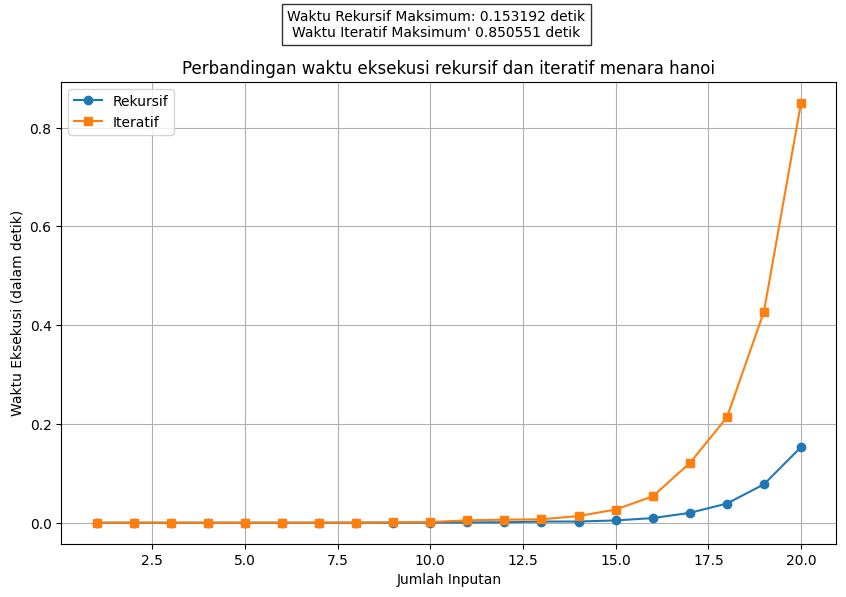

In [24]:
# Main function untuk menjalankan perbandingan
def main():
    inputan = list(range(1, 21))
    waktu_rekursif, waktu_iteratif = ukuran_waktu(inputan)
    waktu_eksekusi(inputan, waktu_rekursif, waktu_iteratif)
    plot_perbandingan(inputan, waktu_rekursif, waktu_iteratif)

if __name__ == "__main__":
    main()
